# The Sparks Foundation
# Task 1 : Prediction using Supervised ML

Analyst : Harsh Bhim

Problem statement: Predict the percentage score of a student based on the No. of Study Hours.

In [1]:

# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# Importing dataset

url='http://bit.ly/w-data'
data=pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


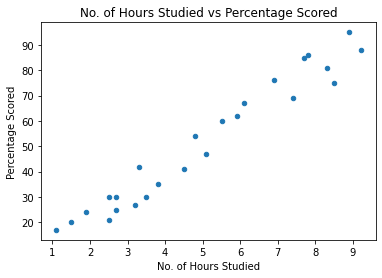

In [22]:
# Scatter plot

data.plot(kind = 'scatter', x='Hours',y='Scores', style = 'x')
plt.title('No. of Hours Studied vs Percentage Scored')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [7]:
# Correlation

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


With the help of Scatter plot and Correlation we can say that,
There is a strong direct positive correlation between number of hours studied and scores obtained

# Preparing the data

In [8]:
# Defining Variables

X = data[['Hours']]
Y = data['Scores']

In [9]:
# Splitting the dataset into train and test data, considering 80% for train and 20% for test
# import required library

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# Training the model

In [10]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [11]:
lreg.fit(X_train,Y_train)

LinearRegression()

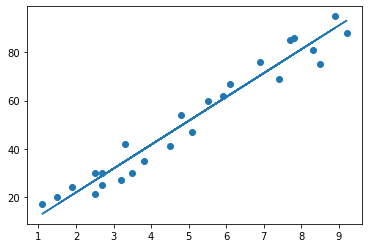

Equation of line : Y=  9.910656480642237 X+ 2.018160041434683


In [14]:
line = lreg.coef_*X+lreg.intercept_

# Plot the fit line

plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

print (('Equation of line : Y= '), str(lreg.coef_[0]),('X+'), str(lreg.intercept_))

# Testing Model

In [15]:
print('Training Score: ', round(lreg.score(X_train,Y_train)*100,2),'%')
print('Testing Score: ', round(lreg.score(X_test,Y_test)*100,2),'%')

Training Score:  95.16 %
Testing Score:  94.55 %


In [16]:
# Comparing Actual vs Predicted Values

pred = lreg.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': Y_test,'Predicted':pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [18]:
# Checking Mean Absolute Error

from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(Y_test,pred))

Mean Absolute Error: 4.183859899002975


Since MAE calucate is low and R sqaure (test) is 94.55 %, which concludes model explains 94.55 % of varation in the data.

# Data Prediction 

In [20]:
# Predict the percentage score of a student based on the No. of Study Hours.
# What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours = np.array([[9.25]])
own_pred = lreg.predict(hours)
print("No. of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737538
